# Assignment Group 75
Members:

1.   Satishkumar M - 2023aa05222
2.   Vamsikrishna K - 2023aa05209
3.   Bharadwaj AP - 2023aa05127
4.   Tulassinad RP - 2023aa05024
5.   Vignesh Kumar M - 2023ab05006

# Importing Libraries and loading the Datasets

In [26]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

# Load datasets
train_data = pd.read_csv("twitter_training.csv")
test_data = pd.read_csv("twitter_validation.csv")

In [27]:
# Display a preview of the training dataset
print(train_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [28]:
# Display a preview of the testing dataset
print(test_data.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

# 1. Data Preparation

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import re

nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    text = str(text) # Ensuring the input is a string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Removing the URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Removing the @ and hashtags
    text = text.lower()  # Converting to lowercase
    text = re.sub(r'\d+', '', text)  # Removing the numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removing the special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

train_data = pd.read_csv("twitter_training.csv", header=None, names=["ID", "Label", "Sentiment", "Tweet"]) # Adding the header so that the 1st row of data is not taken as the header
test_data = pd.read_csv("twitter_validation.csv", header=None, names=["ID", "Label", "Sentiment", "Tweet"])

# Replacing the NaN values in 'Tweet' column with empty strings
train_data['Tweet'] = train_data['Tweet'].fillna('')
test_data['Tweet'] = test_data['Tweet'].fillna('')

# Applying preprocessing
train_data['cleaned_text'] = train_data['Tweet'].apply(preprocess_text) # In training Data
test_data['cleaned_text'] = test_data['Tweet'].apply(preprocess_text) # In testing Data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Exploratory Data Analysis

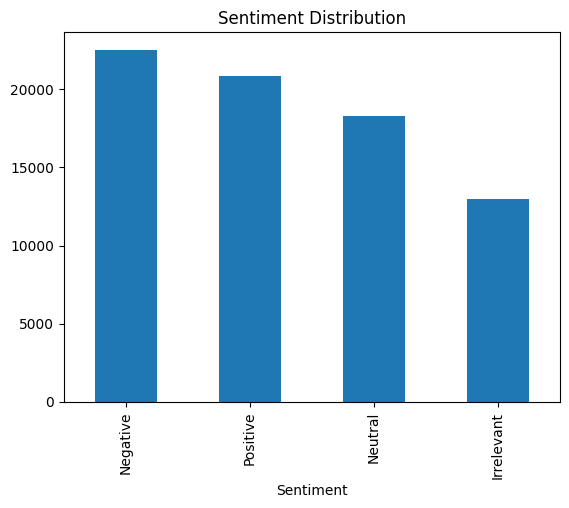

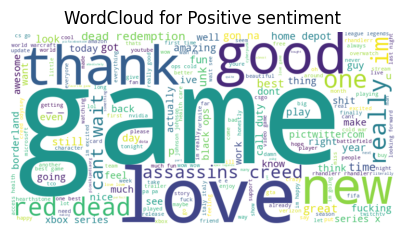

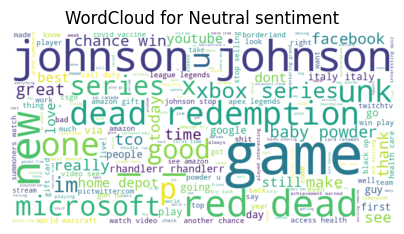

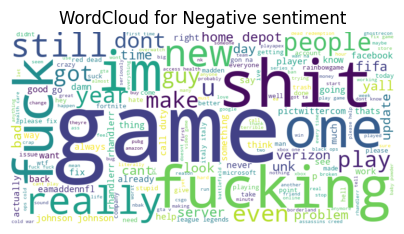

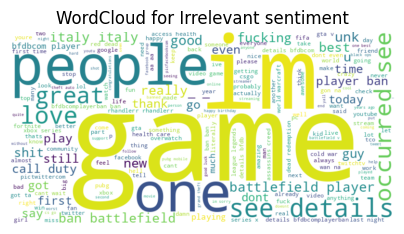

In [30]:
# Sentiment distribution using a bar graph
train_data['Sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()

# Creating a WordCloud for each sentiment
sentiments = train_data['Sentiment'].unique()
for sentiment in sentiments:
    text = " ".join(train_data[train_data['Sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 2.5))
    print()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {sentiment} sentiment")
    plt.axis('off')
    plt.show()

# 3. Feature Extraction


In [43]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['cleaned_text'])
y_test = test_data['Sentiment']

# 4. Model Tuning


In [44]:
# Using the Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# 5. Model Evaluation


Accuracy: 0.77
Precision: 0.79
Recall: 0.77
F1 Score: 0.77
              precision    recall  f1-score   support

  Irrelevant       0.88      0.60      0.71       172
    Negative       0.69      0.89      0.78       266
     Neutral       0.87      0.66      0.75       285
    Positive       0.75      0.88      0.81       277

    accuracy                           0.77      1000
   macro avg       0.80      0.75      0.76      1000
weighted avg       0.79      0.77      0.77      1000



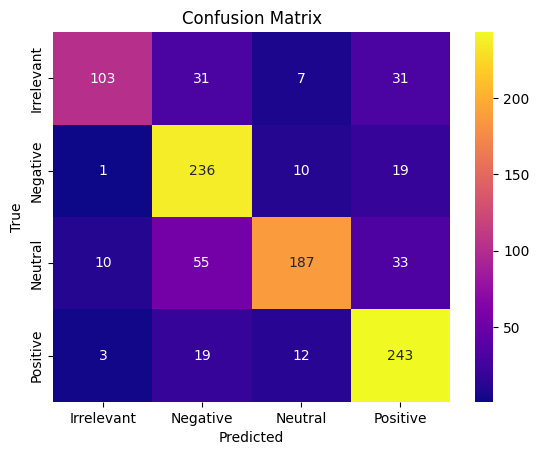

In [45]:
# Predict on the test set
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()